In [1]:
import pandas as pd
import numpy as np

## Домашняя работа

Вам дан датасет с данными о маркетинговой компании.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

### Easy (+0.1)

Посчитать:

- Количество жалоб
- Средний возраст покупателей. Покупатель - тот, кто совершал хотя бы одну покупку за последние два года (колонки Mnt*). Отличается ли он от среднего возраста всех людей в датасете?

### Medium (+0.4)

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- возраст

Кратко напишите выводы.

### Hard (+ в карму)

Вы - аналитик в магазине. Маркетологи сказали, что следующую компанию хотели бы запустить на целевую аудиторию магазина.

Предложите подход как понять, что такое "целевая аудитория", обоснуйте его при помощи данных и найдите ID покупателей, которые относятся к ним.

## Easy

In [2]:
data = pd.read_excel('../data/marketing_campaign.xlsx')

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
cnt_compl = data['Complain'].sum()
print('Количество жалоб: ', cnt_compl)

Количество жалоб:  21


In [5]:
data['Age'] = 2024 - data['Year_Birth']
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,57
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,43
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,68


In [6]:
avg_age_all = data['Age'].mean()
print('Средний возраст всех людей в датасете: ', avg_age_all)

Средний возраст всех людей в датасете:  55.19419642857143


In [7]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [8]:
mnt_cols = []
for col in data.columns:
    if col.startswith('Mnt'):
        mnt_cols.append(col)
mnt_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [9]:
data['Sum_mnt'] = data[mnt_cols].sum(axis=1)

In [10]:
print('Средний возраст покупателей: ', data[data['Sum_mnt'] > 0]['Age'].mean())

Средний возраст покупателей:  55.19419642857143


Видим, что средний возраст покупателей и всех людей в датасете одинаковый:)

## Medium

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
cols = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
        'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Age']

In [13]:
data[cols].dtypes

Education             object
Marital_Status        object
Income               float64
Kidhome                int64
Teenhome               int64
Recency                int64
NumWebPurchases        int64
NumStorePurchases      int64
Age                    int64
dtype: object

In [14]:
num_cols = ['Income', 'Kidhome', 'Teenhome',
        'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Age']
cat_cols = ['Education', 'Marital_Status']

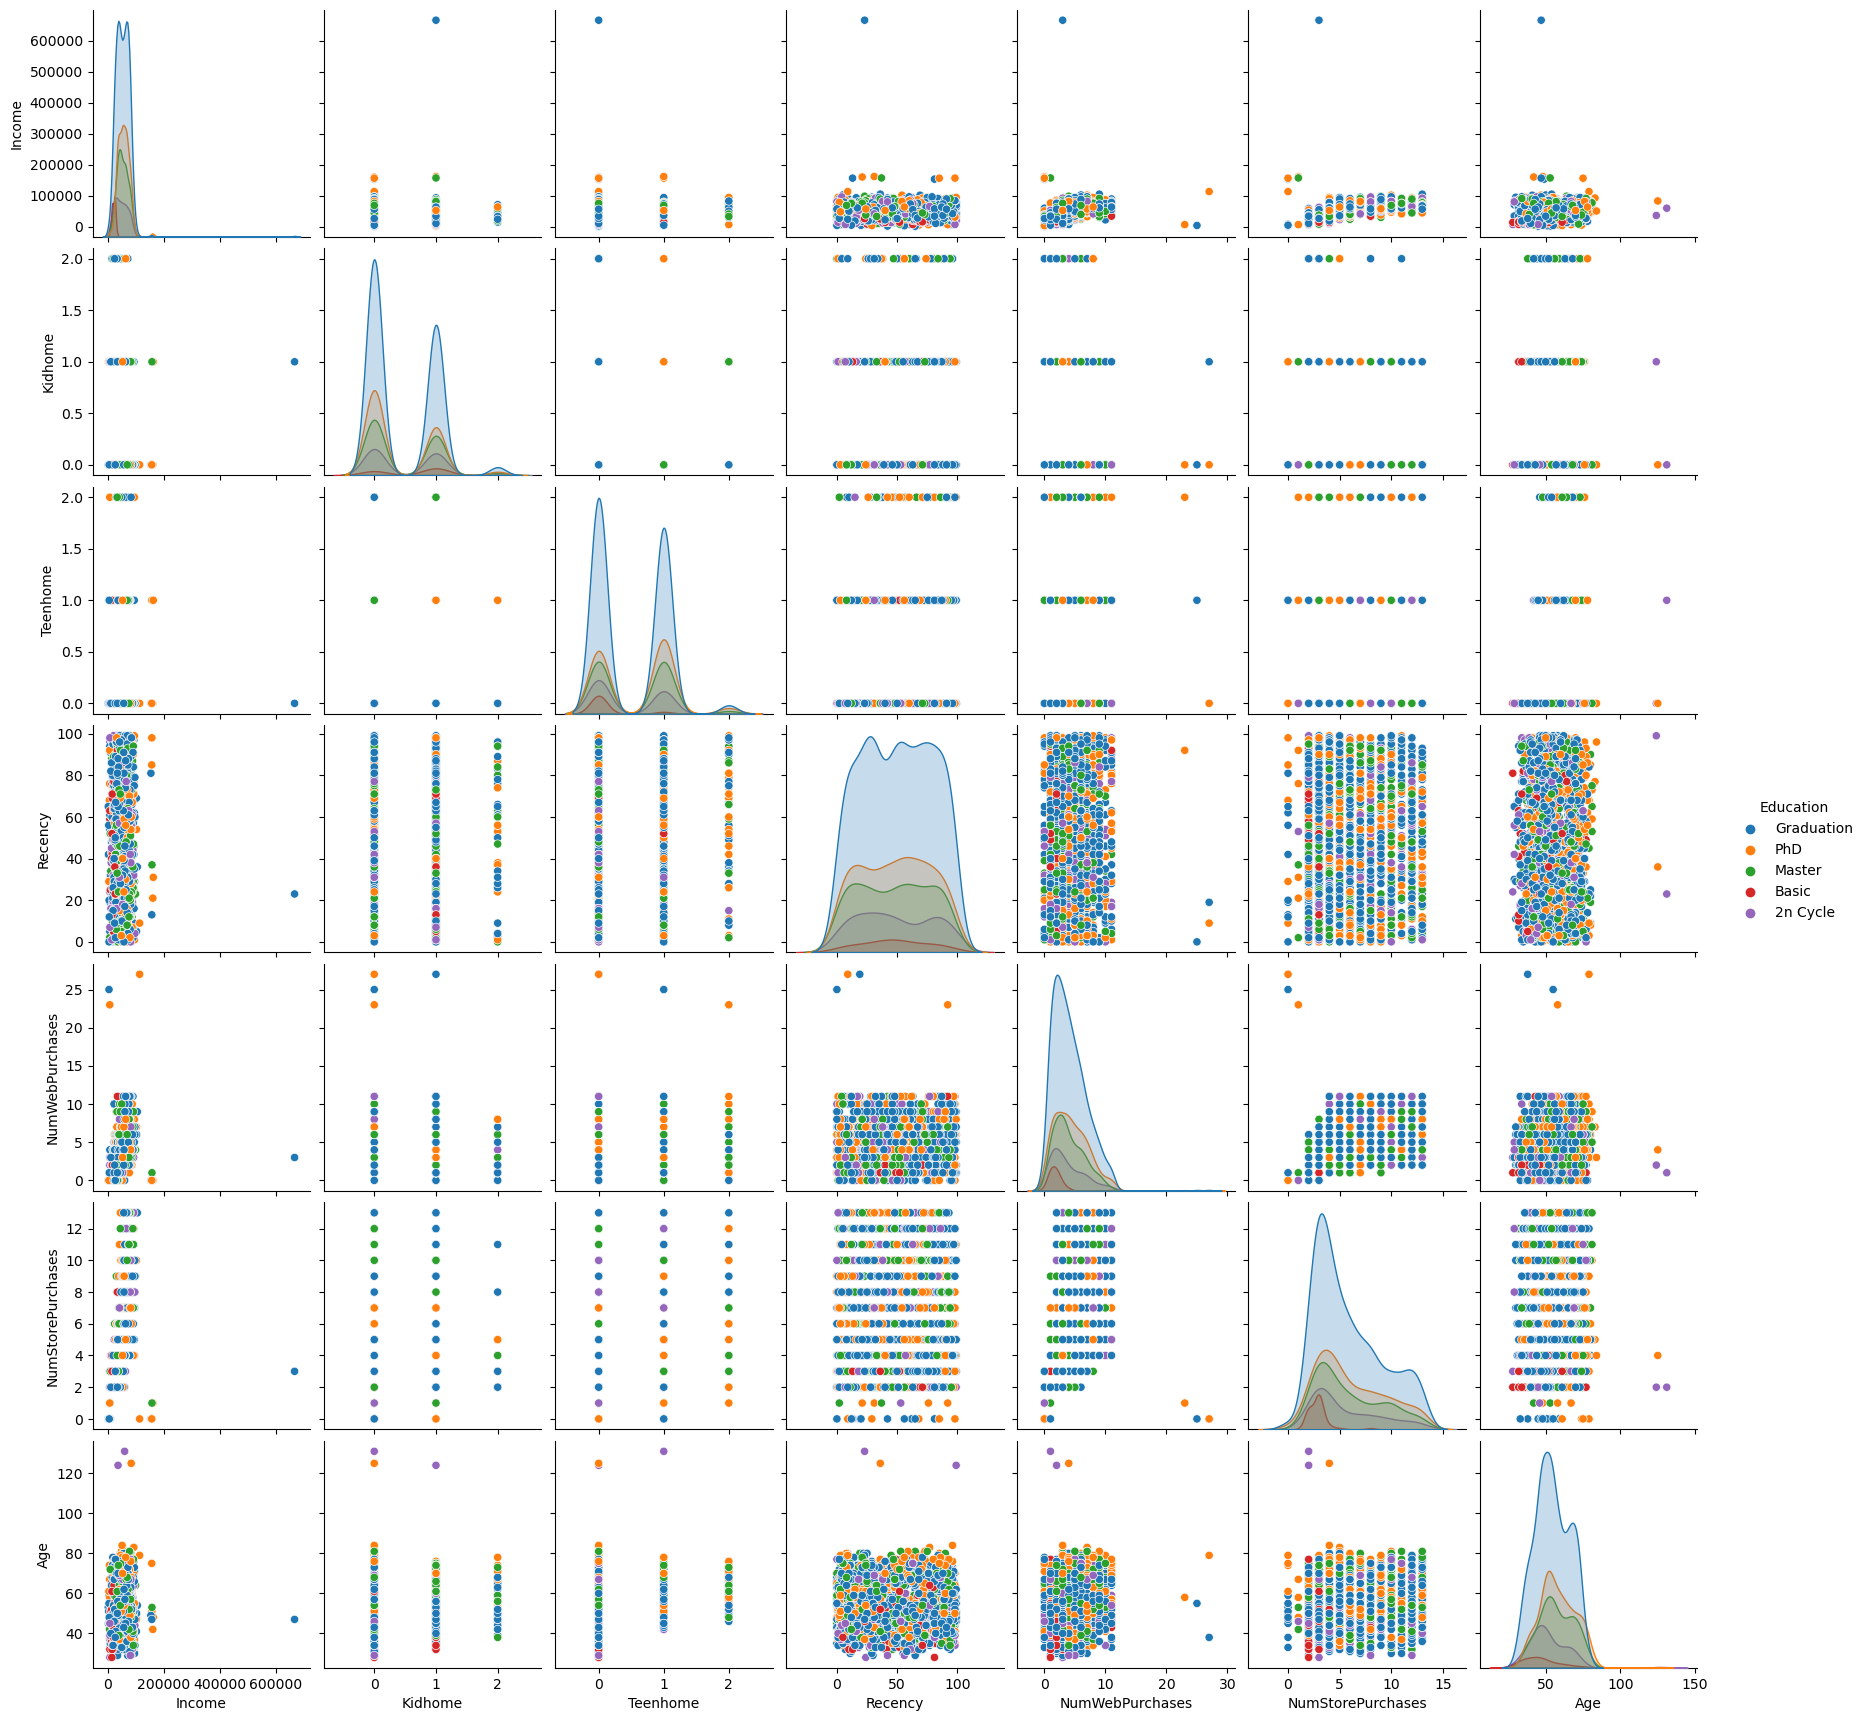

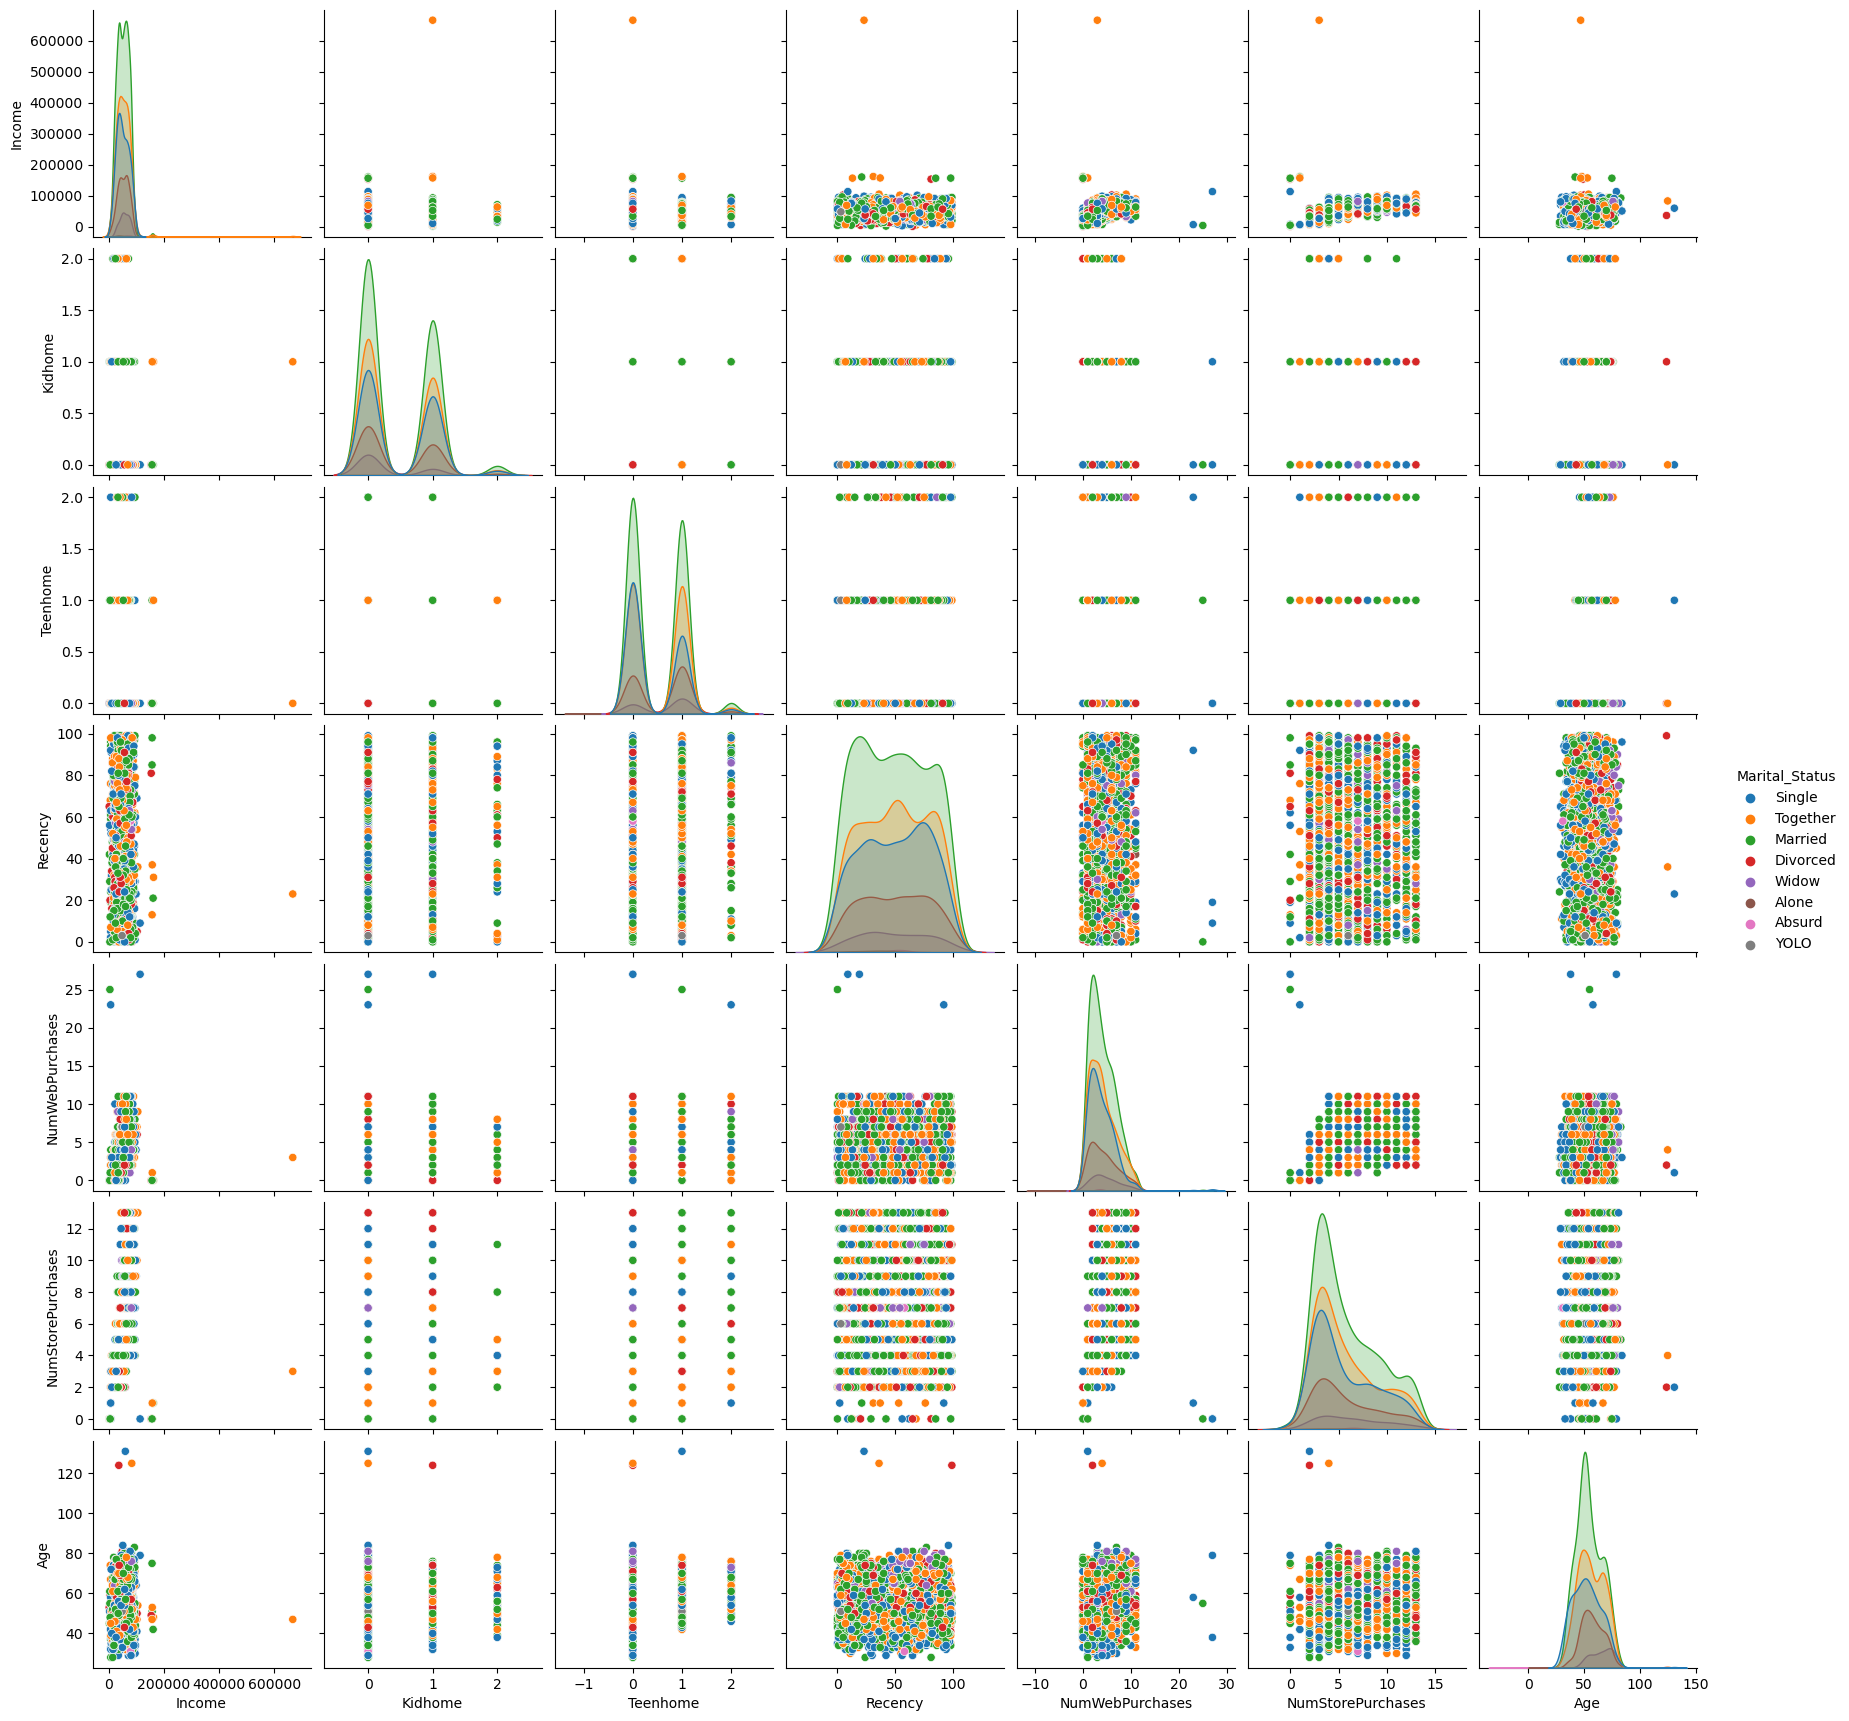

In [15]:
sns.pairplot(data, hue='Education', vars=num_cols)
plt.show()

sns.pairplot(data, hue='Marital_Status', vars=num_cols)
plt.show()

Можно заметить некоторую связь между Income и NumWebPurchases, Income и NumStorePurchases (чем больше Income, тем больше покупок), NumStorePurchases и NumWebPurchases (чем больше одного, тем больше другого). В остальном скорее нет

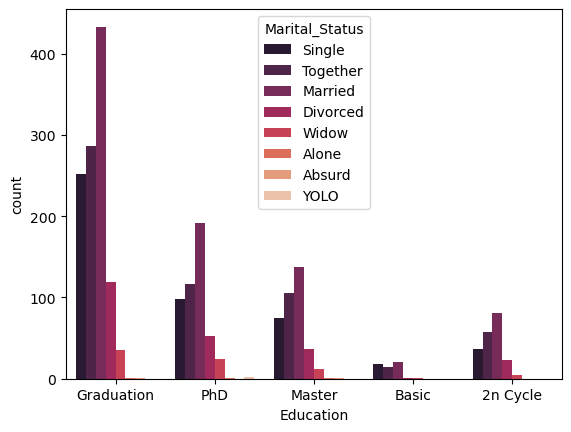

In [16]:
sns.countplot(data=data, x='Education', hue='Marital_Status', palette='rocket')
plt.show()
# удивительно, что замужних больше в каждой категории

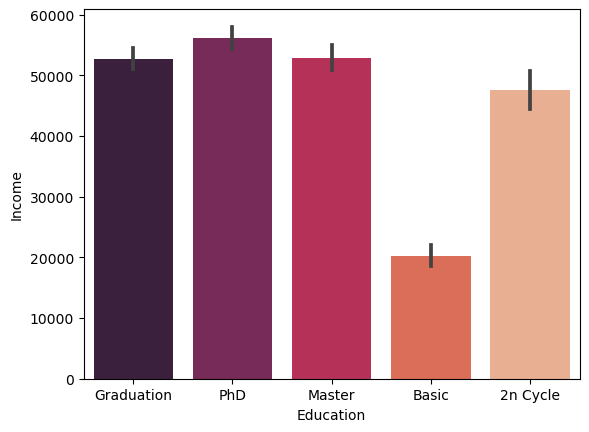

In [17]:
sns.barplot(data=data, x='Education', y='Income', palette='rocket')
plt.show()
# basic зарабатывают меньше

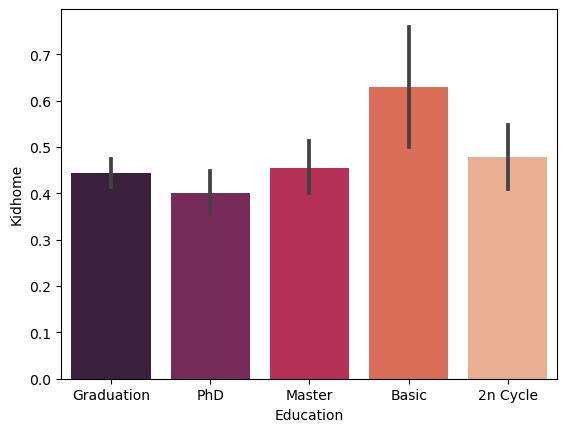

In [18]:
sns.barplot(data=data, x='Education', y='Kidhome', palette='rocket')
plt.show()
# у basic младенцев больше

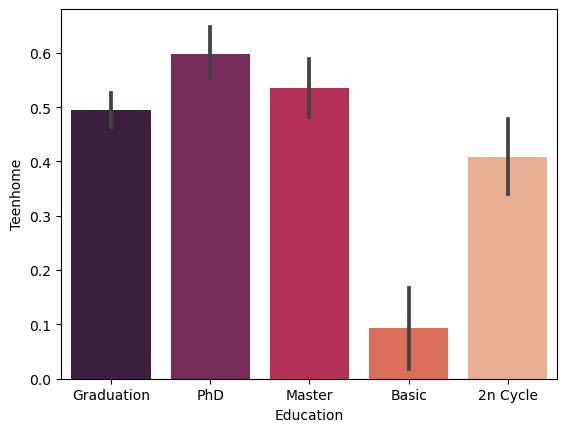

In [19]:
sns.barplot(data=data, x='Education', y='Teenhome', palette='rocket')
plt.show()
# а подростков у basic меньше

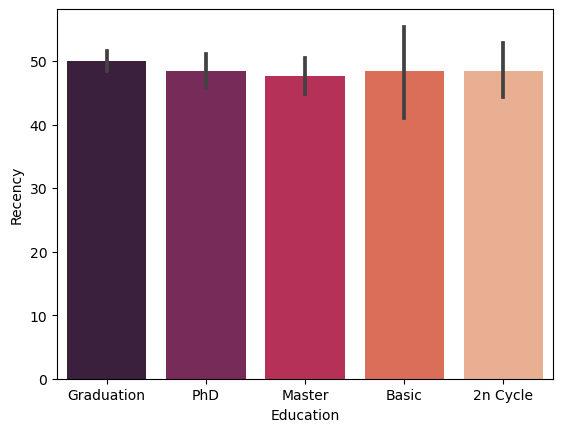

In [20]:
sns.barplot(data=data, x='Education', y='Recency', palette='rocket')
plt.show()

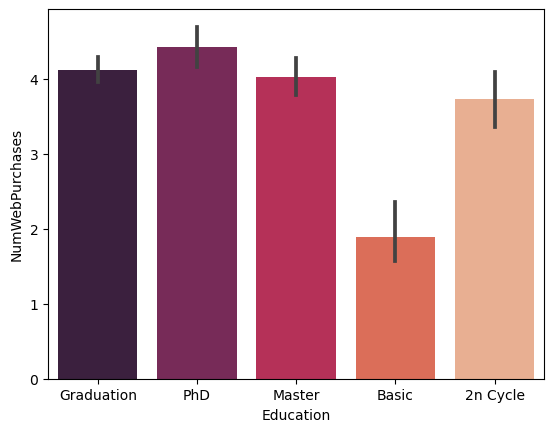

In [21]:
sns.barplot(data=data, x='Education', y='NumWebPurchases', palette='rocket')
plt.show()
# можно заметить, что люди с basic-образованием покупают меньше

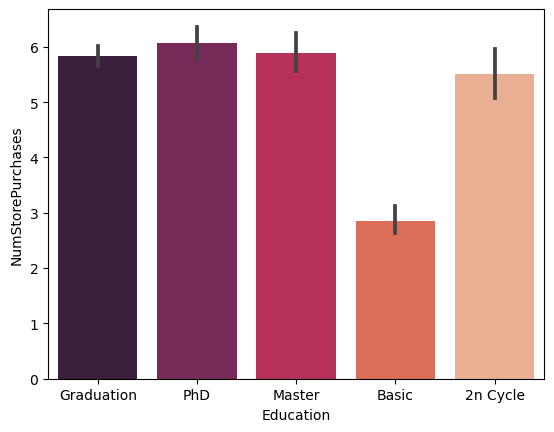

In [22]:
sns.barplot(data=data, x='Education', y='NumStorePurchases', palette='rocket')
plt.show()
# аналогично, люди с basic-образованием покупают меньше

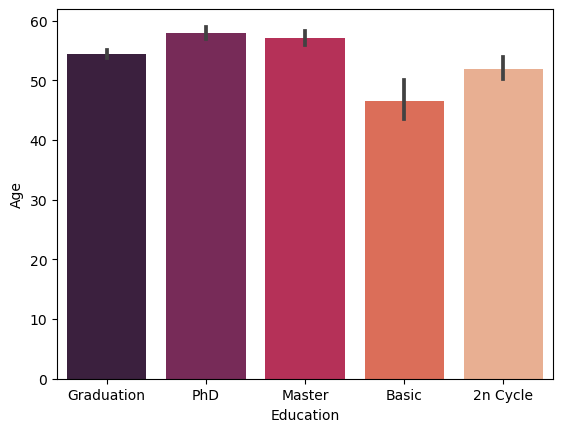

In [23]:
sns.barplot(data=data, x='Education', y='Age', palette='rocket')
plt.show()
# тут для basic очевидная зависимость

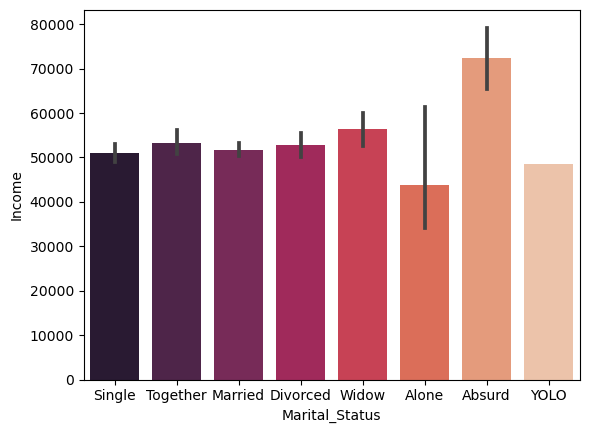

In [24]:
sns.barplot(data=data, x='Marital_Status', y='Income', palette='rocket')
plt.show()
# можно сказать, что alone зарабывают меньше, а absurd больше

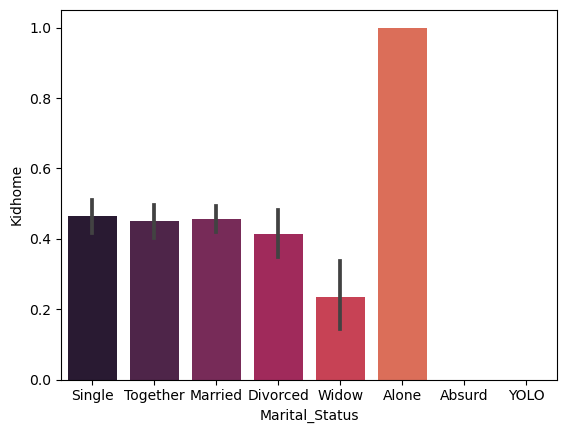

In [25]:
sns.barplot(data=data, x='Marital_Status', y='Kidhome', palette='rocket')
plt.show()
# у widow младенцев чаще не бывает, а у alone бывают

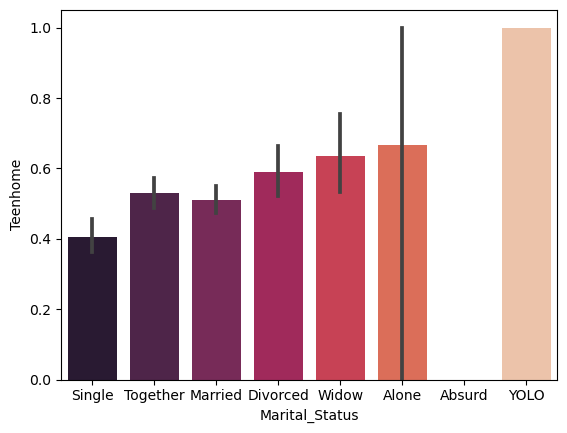

In [26]:
sns.barplot(data=data, x='Marital_Status', y='Teenhome', palette='rocket')
plt.show()

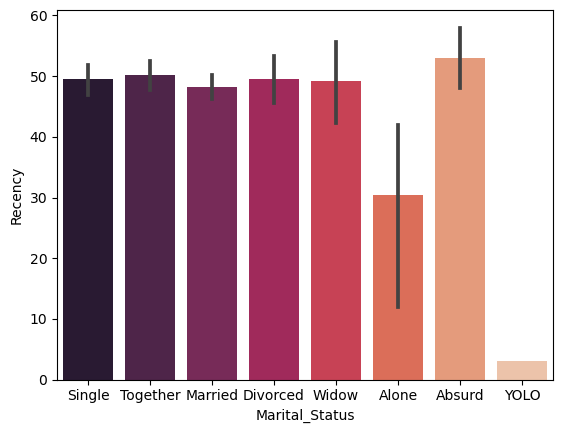

In [27]:
sns.barplot(data=data, x='Marital_Status', y='Recency', palette='rocket')
plt.show()
# у yolo и alone проходит меньше дней с последней покупки

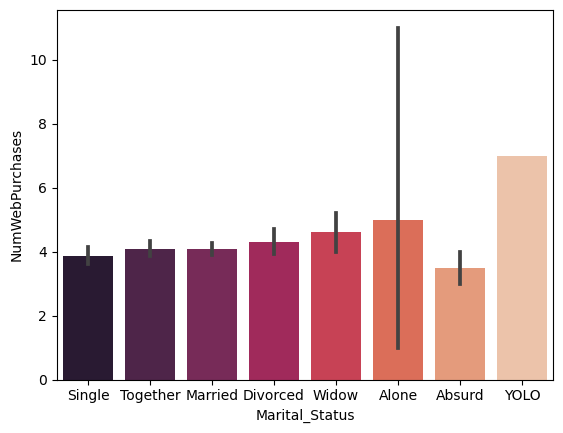

In [28]:
sns.barplot(data=data, x='Marital_Status', y='NumWebPurchases', palette='rocket')
plt.show()
# yolo покупают онлайн больше, absurd меньше (но численно различия небольшие)

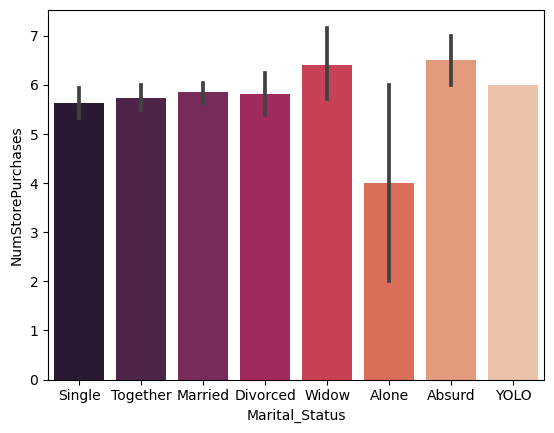

In [29]:
sns.barplot(data=data, x='Marital_Status', y='NumStorePurchases', palette='rocket')
plt.show()
# alone покупают меньше в store (но численно различия небольшие)

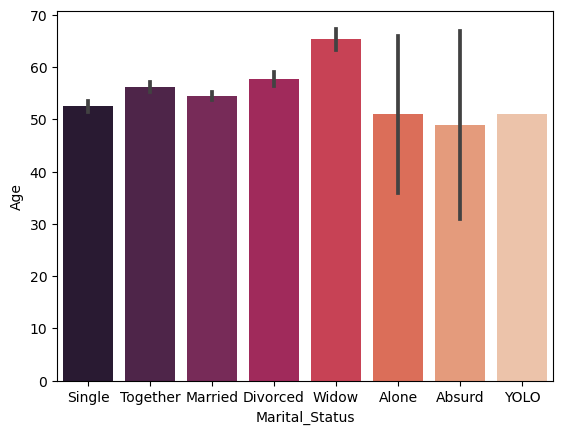

In [30]:
sns.barplot(data=data, x='Marital_Status', y='Age', palette='rocket')
plt.show()